# 6.2 Exploring relationships

## This script contains the following points:

1. Set up a Jupyter notebook with visualization libraries, and import the cleaned data set you chose in the previous Exercise.

2. Pick out variables for exploratory visual analysis.

3. Create a correlation matrix heatmap (colored)

4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

5. Create a pair plot of the entire data set

6. Create a categorical plot and interpret the results

7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration

8. Define any hypotheses that you can at this point. You’ll be testing these later on

## 1. Set up a Jupyter notebook with visualization libraries, and import the cleaned data set you chose in the previous Exercise.

In [4]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [6]:
# Import the cleaned dataset

path = r'C:\Users\admin\08-2024 Open-Sourced Data Analysis'
df = pd.read_csv(os.path.join(path, 'Data', 'health_cleaned.csv'), encoding='unicode_escape', index_col = False)

In [8]:
df.head()

,location,year_start,year_end,cog_decline,assistance_cog_decline,subj_cog_decline_more,subj_cog_decline_report,mental_distress,lifetime_depression,2_more_fruits,3_more_fruits,non_physical,obesity,suficient_sleep,subj_bad_health,subj_good_health,high_blood_press_med,high_blood_press,drinking_30_days,smoking
0,Alabama,2015.0,2015.0,48.3,41.7,12.8,45.5,12.4,23.0,18.2,10.6,37.3,36.2,NaN,30.0,70.0,90.7,60.6,6.6,17.3
1,Alabama,2016.0,2016.0,NaN,NaN,NaN,NaN,12.8,22.6,NaN,NaN,36.3,36.0,65.4,30.6,69.4,NaN,NaN,7.6,18.0
2,Alabama,2017.0,2017.0,NaN,NaN,NaN,NaN,13.3,23.3,24.1,11.1,38.9,36.7,NaN,33.0,67.0,90.6,61.8,6.9,16.7
3,Alabama,2018.0,2018.0,NaN,NaN,NaN,NaN,14.0,24.0,NaN,NaN,36.6,37.3,65.0,31.2,68.8,NaN,NaN,6.8,16.4
4,Alabama,2019.0,2019.0,45.1,38.7,14.7,45.2,13.4,22.0,28.3,11.6,36.4,36.7,NaN,31.1,68.9,90.6,62.6,6.9,17.2


In [10]:
df.dtypes

location                    object
year_start                 float64
year_end                   float64
cog_decline                float64
assistance_cog_decline     float64
subj_cog_decline_more      float64
subj_cog_decline_report    float64
mental_distress            float64
lifetime_depression        float64
2_more_fruits              float64
3_more_fruits              float64
non_physical               float64
obesity                    float64
suficient_sleep            float64
subj_bad_health            float64
subj_good_health           float64
high_blood_press_med       float64
high_blood_press           float64
drinking_30_days           float64
smoking                    float64
dtype: object

In [14]:
df.columns

Index(['location', 'year_start', 'year_end', 'cog_decline',
       'assistance_cog_decline', 'subj_cog_decline_more',
       'subj_cog_decline_report', 'mental_distress', 'lifetime_depression',
       '2_more_fruits', '3_more_fruits', 'non_physical', 'obesity',
       'suficient_sleep', 'subj_bad_health', 'subj_good_health',
       'high_blood_press_med', 'high_blood_press', 'drinking_30_days',
       'smoking'],
      dtype='object')

## 2. Pick out variables for exploratory visual analysis.

I checked the questions I defined in 6.1 and don't think any of them can be answered by doing exploratory visual analysis, so I defined more questions which I think are answerable via visualizations:

- Is there any relationship between "mental health and issue" and "smoking and alcohol use"?
- Is there any relationship between "mental health and issue" and "cognitive decline or memory loss"?
- Is there a positive relationship between "smoking and alcohol use" use and "cognitive decline or memory loss"?

In [16]:
# Create a subset

df_sub = df[['cog_decline', 'assistance_cog_decline', 'subj_cog_decline_more', 'subj_cog_decline_report', 'mental_distress', 'lifetime_depression', 'drinking_30_days', 'smoking']]

In [20]:
df_sub.head()

,cog_decline,assistance_cog_decline,subj_cog_decline_more,subj_cog_decline_report,mental_distress,lifetime_depression,drinking_30_days,smoking
0,48.3,41.7,12.8,45.5,12.4,23.0,6.6,17.3
1,NaN,NaN,NaN,NaN,12.8,22.6,7.6,18.0
2,NaN,NaN,NaN,NaN,13.3,23.3,6.9,16.7
3,NaN,NaN,NaN,NaN,14.0,24.0,6.8,16.4
4,45.1,38.7,14.7,45.2,13.4,22.0,6.9,17.2


## 3. Create a correlation matrix heatmap (colored)

In [22]:
# Create a correlation matrix

df_sub.corr()

,cog_decline,assistance_cog_decline,subj_cog_decline_more,subj_cog_decline_report,mental_distress,lifetime_depression,drinking_30_days,smoking
cog_decline,1.000000,0.871827,0.032371,0.315879,0.524191,0.291242,-0.363088,0.225760
assistance_cog_decline,0.871827,1.000000,-0.002115,0.349723,0.505930,0.279266,-0.348178,0.219876
subj_cog_decline_more,0.032371,-0.002115,1.000000,-0.174849,0.429057,0.365068,-0.211521,0.394697
subj_cog_decline_report,0.315879,0.349723,-0.174849,1.000000,0.304541,0.330923,-0.168387,-0.004361
mental_distress,0.524191,0.505930,0.429057,0.304541,1.000000,0.611729,-0.475971,0.418948
lifetime_depression,0.291242,0.279266,0.365068,0.330923,0.611729,1.000000,-0.490392,0.258951
drinking_30_days,-0.363088,-0.348178,-0.211521,-0.168387,-0.475971,-0.490392,1.000000,0.011838
smoking,0.225760,0.219876,0.394697,-0.004361,0.418948,0.258951,0.011838,1.000000


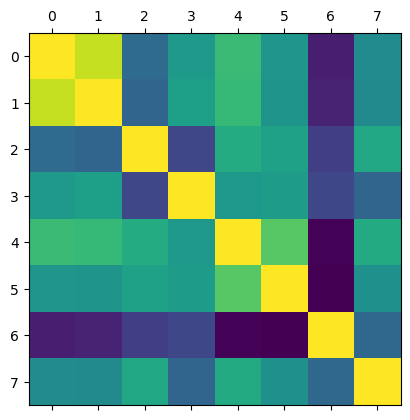

In [24]:
# Create a correlation heatmap

plt.matshow(df_sub.corr())
plt.show()

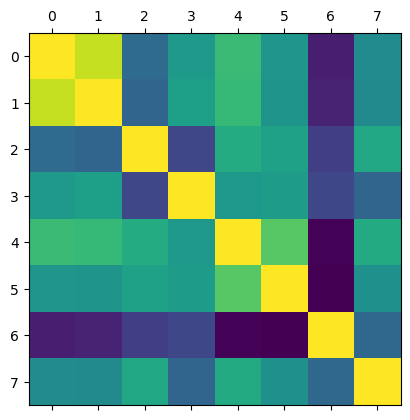

In [26]:
# Save the figure of correlation heatmap of matplotlib
plt.matshow(df_sub.corr())
plt.savefig("correlation_heatmap_matplotlib.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [28]:
# Check for work directory
cwd = os.getcwd()
cwd

'C:\\Users\\admin\\08-2024 Open-Sourced Data Analysis\\Script'

Text(0.5, 1.0, 'Correlation Matrix')

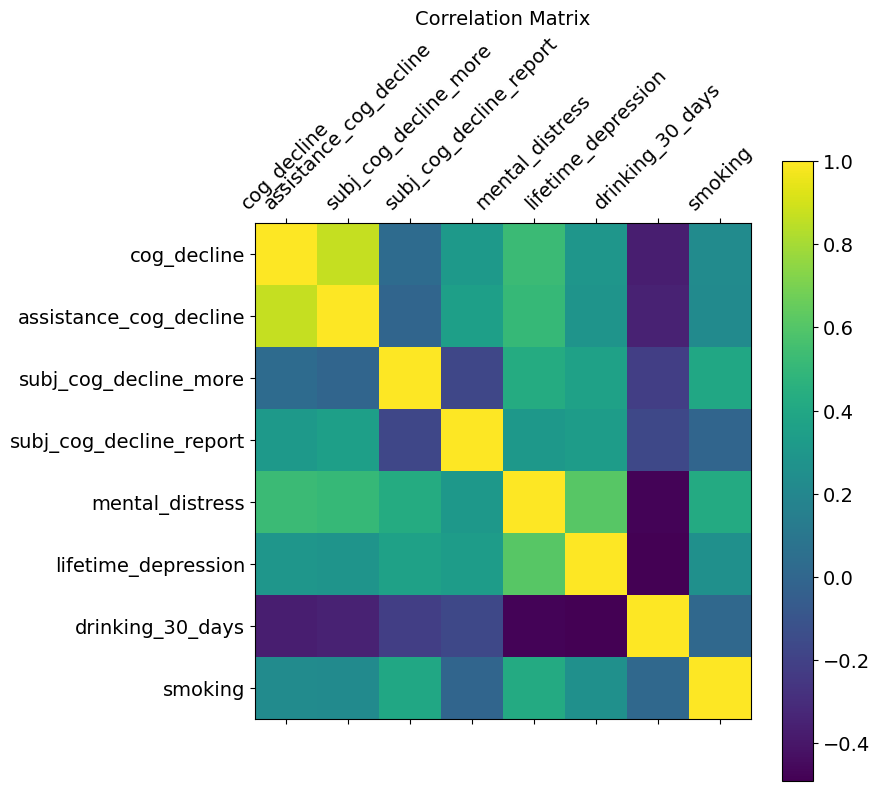

In [34]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

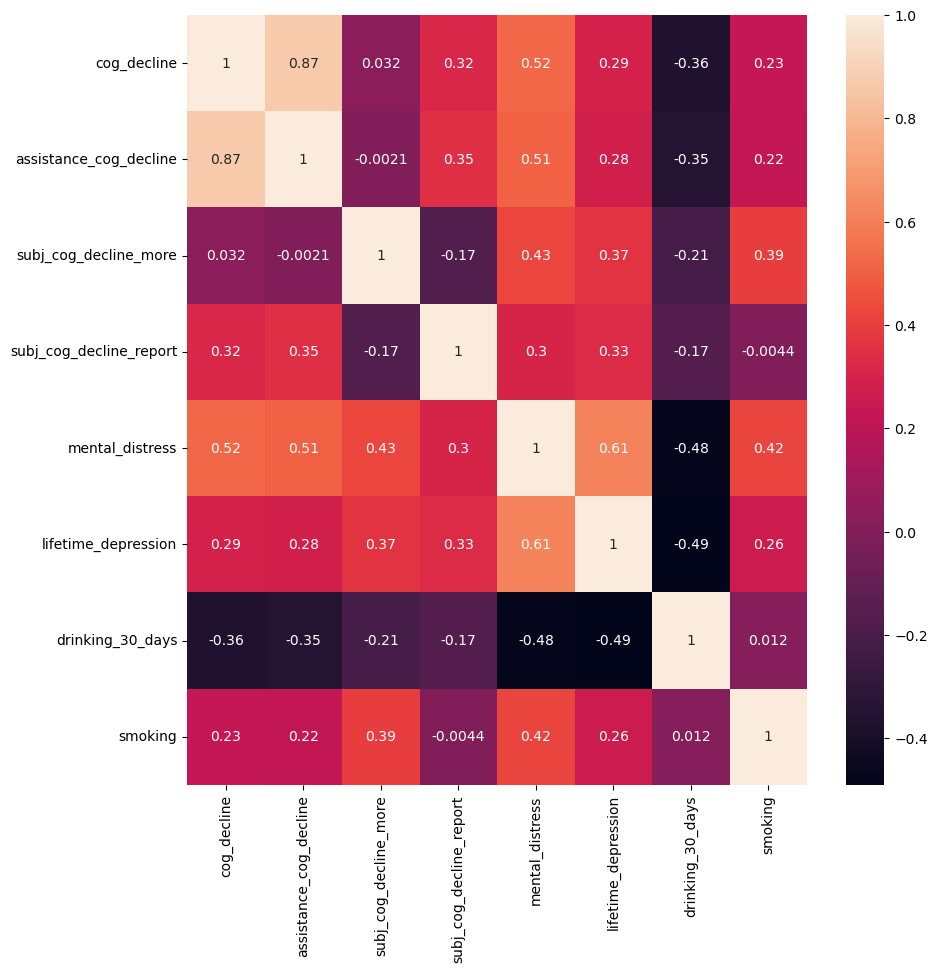

In [36]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

There is a moderate positive relationship between smoking and mental health issues, while alcohol use shows a negative relationship with mental health issues. There is a moderate positive relationship between mental health issues and cognitive decline or memory loss. Smoking shows a weak positive relationship with cognitive decline or memory loss, while alcohol use is negatively correlated, suggesting that those who consume more alcohol report lower levels of cognitive decline or memory loss. In conclusion, mental health issues are positively related to smoking and cognitive decline but negatively related to alcohol use. Cognitive decline has a weak positive relationship with smoking but a negative relationship with alcohol use.

## 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

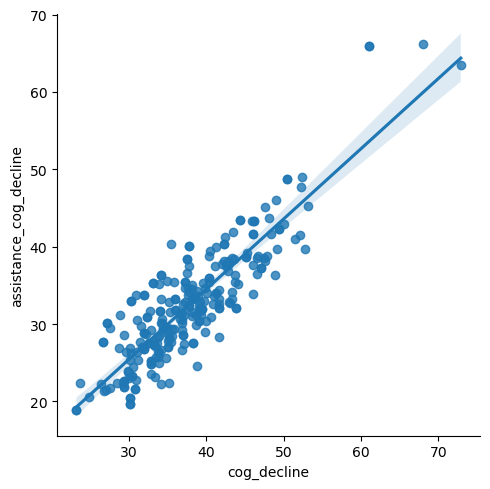

In [42]:
# Create a scatterplot for the "cog_decline" and "assistance_cog_decline" columns in seaborn

sns.lmplot(x = 'cog_decline', y = 'assistance_cog_decline', data = df_sub)

In the scatterplot, there's a strong relationship and the trend line is steep. Which makes sense very much, as the more percentage of people have cognitive decline, the more people, as a result of subjective cognitive decline or memory loss, need assistance with day-to-day activities.

## 5. Create a pair plot of the entire data set

I would like to use a pair plot to explore the relationship between mental health and the use of alcohol and smoking

In [67]:
df_sub_2 = df_sub[['mental_distress', 'lifetime_depression', 'drinking_30_days', 'smoking']]

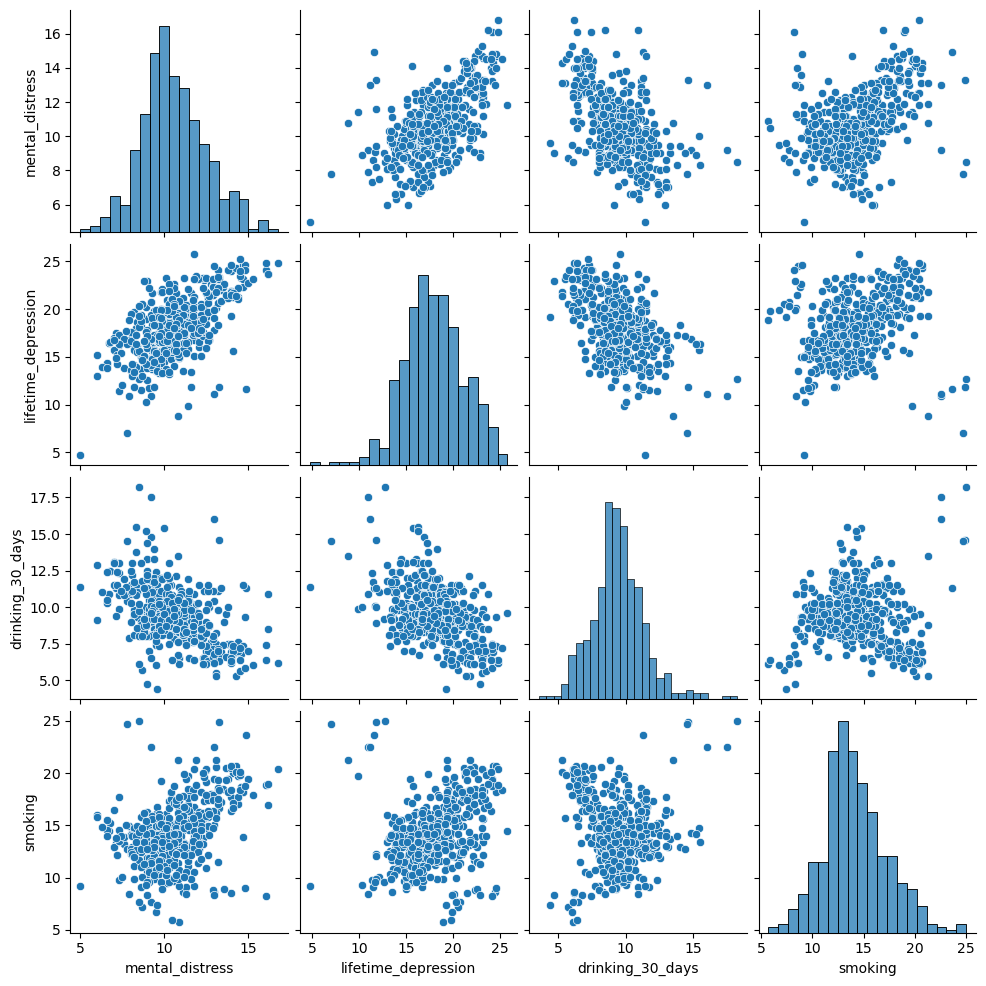

In [47]:
# Create a pair plot 

g = sns.pairplot(df_sub_2)

The pair plot shows that there is a positive relationship between having mental distress and having a lifetime diagnosis of depression. It also shows that there is a negative relationship between drinking alcohol and having mental issue, which means it could be that elder adults who tend to drink alcohol tend to have less mental problems. Also, there's a positive relationship between smoking and having mental distress.

## 6. Create a categorical plot and interpret the results

In [51]:
df.rename(columns = {'suficient_sleep' : 'sufficient_sleep'}, inplace = True)

<Axes: xlabel='sufficient_sleep', ylabel='Count'>

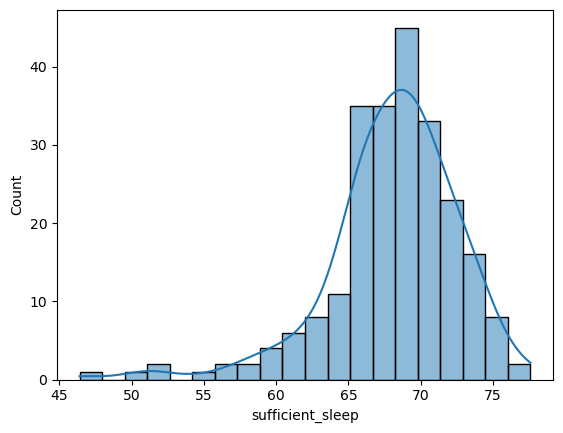

In [53]:
sns.histplot(df['sufficient_sleep'], bins = 20, kde = True)

The column "sufficent_sleep" represents the percentage of older adults getting sufficient sleep (>6 hours) around U.S. It is shown in the plot that the most frequent distribution falls between 65 and 70, which shows that in most U.S. states, more than half of people whose age is greater than 50, usually 65%-70%, have enough time of sleep.

## 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration

I rechecked the questions I defined in the previous exercise and don't think I can answer any of them. However, the heatmap I created in this exercise answered the questions I defined for exploratory visual analysis: 

- Is there any relationship between "mental health and issue" and "smoking and alcohol use"?
- Is there any relationship between "mental health and issue" and "cognitive decline or memory loss"?
- Is there a positive relationship between "smoking and alcohol use" use and "cognitive decline or memory loss"?

Answer (from question 3): There is a moderate positive relationship between smoking and mental health issues, while alcohol use shows a negative relationship with mental health issues. There is a moderate positive relationship between mental health issues and cognitive decline or memory loss. Smoking shows a weak positive relationship with cognitive decline or memory loss, while alcohol use is negatively correlated, suggesting that those who consume more alcohol report lower levels of cognitive decline or memory loss. In conclusion, mental health issues are positively related to smoking and cognitive decline but negatively related to alcohol use. Cognitive decline has a weak positive relationship with smoking but a negative relationship with alcohol use.

Also, I would like to add some new questions:

- How have lifestyle factors (e.g., diet, physical activity, smoking) influenced the progression of cognitive decline over time?
- What factors predict subjective cognitive decline among older adults? (e.g., mental distress, depression, obesity, lifestyle factors)
- Which states report the highest levels of subjective cognitive decline, and how does this compare with the need for assistance due to cognitive decline?
- How do lifestyle factors (e.g., diet, physical activity, smoking, alcohol use) differ between those reporting cognitive decline and those who do not?
- What is the distribution of health behaviors (e.g., fruit and vegetable consumption, physical activity, smoking) among older adults?

## 8. Define any hypotheses that you can at this point. You’ll be testing these later on

Hypothesis 1: There is a positive relationship between high blood pressure and cognitive decline (as it is a known risk factor for Alzheimer's)

Hypothesis 2: Older adults who are physically inactive are more likely to report cognitive decline than those who engage in regular physical activity.

Hypothesis 3: There is a negative relationship between the consumption of fruits and vegetables and cognitive decline among older adults.

Hypothesis 4: The relationship between obesity (BMI of 30 or more) and the reporting of cognitive decline among older adults is strongly positive

Hypothesis 5: There is a strongly negative correlation between self-reported sleep sufficiency (getting more than 6 hours of sleep) and cognitive decline.